# Intro to inferential statistics: the Central Limit Therem

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install celluloid

In [3]:
from IPython.display import HTML
from celluloid import Camera

## Generate a population

We  artificially generate 10,000 random observations that follow a **weird distribution**. This is going to be our population.

Note: we generally don't have access to data about the entire population. We only do this for learning purposes, to demonstrate where do some concepts emerge from.

To generate samples from a given distribution, we can use the scipy stats module: scipy.stats. Then we nedd to specify the intended distribution and use the `rvs` function.

In [4]:
# some of the observations follow an exponential dist
r1 = stats.expon.rvs(size=10000, random_state=1000)

# some follow a normal dist. loc = mean, scale = sigma
r2 = stats.norm.rvs(loc=2, scale=1.5, size=10000, random_state=847)

# some follow a constant dist: loc = min_value, scale = b - a
r3 = stats.uniform.rvs(loc=-2, scale=9, size=10000, random_state=128)

# there's a weird spike at some point
r4 = stats.uniform.rvs(loc=5.5, scale=1, size=10000, random_state=128)

pop = pd.Series(np.concatenate([r1, r2, r3, r4]))

Here's the distribution of our population:

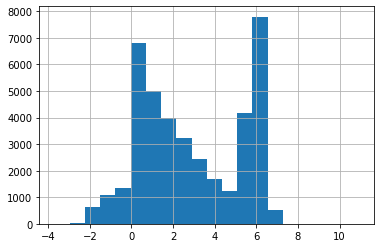

In [6]:
pop.hist(bins=20)

In [9]:
# Population mean:
pop_mean = np.mean(pop)
print("Population mean: {:.2f}".format(pop_mean))

Population mean: 2.88


In [10]:
# Population standard deviation:
pop_std = np.std(pop) 
# np.std by default assumes that you are computing the POPULATION standard deviation, therefore divides by n.
# if you are computing the SAMPLE standard deviation, you need to divide by n - 1 to get an unbiased estimation.
# in order to do this, set the optional parameter ddof = 1.
print("Population standard deviation: {:.2f}".format(pop_std))

Population standard deviation: 2.47


Let's take a sample from our population. The mean of the sample is similar but not equal to the mean of the population. By the way, the mean of the sample is called... well, **sample mean**.

In [11]:
# sample of size 50
sample = pop.sample(50, random_state=9)
sample

22454    5.799907
39325    6.050554
30791    5.922130
33372    6.355715
19237    0.719219
22959    1.809770
29356    0.495226
35059    6.194670
24465    2.511263
8403     0.722131
39444    5.955502
25242    6.457141
11866    1.524035
18661    1.770463
29545   -1.137988
517      1.082234
24401    4.001872
20556    1.323862
29770    0.782960
35419    5.538745
20874    4.202092
16701    0.848766
11483    1.968901
23122    5.040515
1469     0.486209
17180   -0.499076
37096    6.077158
26134    4.150074
20949    2.303613
10740    4.229228
16870    1.295008
401      0.532336
27162    2.373962
6519     1.024246
26447    4.681069
28457    1.520907
17749    3.417334
24905    6.197569
10404    2.515449
24192    4.880308
15521    1.842786
38330    6.361291
22312    4.379458
2544     0.122484
5147     0.175075
39925    5.566331
37312    5.620816
21331    6.855605
33412    6.242717
18950    1.667130
dtype: float64

Let's compare our sample mean with the population mean and get the sampling error for the mean.

In [12]:
# Comparing the population mean and the sample mean.
# Population mean
print("Population mean: {:.2f}".format(pop_mean))

# Sample mean
print("Sample mean: {:.2f}".format(np.mean(sample)))

# Sampling error of the mean
print("Sampling error: {:.2f}".format(np.mean(sample) - pop_mean))

Population mean: 2.88
Sample mean: 3.20
Sampling error: 0.32


In [14]:
# Comparing standard deviations
# Population
print("Population standard deviation {:.2f}".format(pop_std))

# The same happens with the sample standard deviation. Remember that you are using a SAMPLE!
# therefore, you need to divide by n - 1. Here we use the parameter ddof = 1.
print("Sample standard deviation {:.2f}".format(np.std(sample, ddof=1)))

# Sampling error of the standard deviation
print("Sampling error: {:.2f}".format(np.std(sample, ddof=1) - pop_mean))

Population standard deviation 2.47
Sample standard deviation 2.35
Sampling error: -0.53


If we take a diferent sample, the parameters will vary:

In [15]:
# sample of size n
n = 50
sample = pop.sample(n, random_state=314159)

# sample mean
print("Sample mean: {:.2f}".format(np.mean(sample)))

Sample mean: 3.02


# Inspecting the histogram of sample means

Now we take 1000 samples, each one of size 50

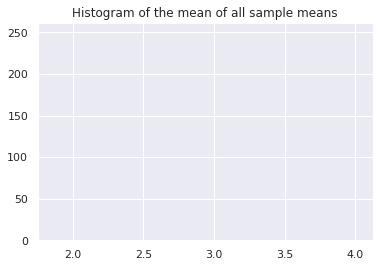

In [25]:
sns.set_theme()

sample_means = []
# Dataframe to contain the mean of each sample
means = pd.DataFrame({'mean_of_means':[]})

fig = plt.figure()
camera = Camera(fig)

for number in range(1000): # We take 1.000 samples
    # Getting a sample
    sample = np.random.choice(pop, size = 50, replace = False )
    #simple_random_sample = pop.sample(n=50)
    # Computing the mean of the current sample
    sample_mean = np.mean(sample)
    # Adding the mean of the current sample to the list of sample means
    sample_means.append(sample_mean)
    # Updating the dataframe of the means of all the samples
    means = means.append({'mean_of_means': sample_mean}, ignore_index=True)
    
    #plt.clf()
    plt.title("Histogram of sample means")
    plt.hist(means['mean_of_means'], color = 'c')
    plt.axvline(x=pop_mean)
    #plt.show()
    
    camera.snap()
    
animation = camera.animate() 


In [26]:
from IPython.display import HTML

HTML(animation.to_html5_video())

If the samples are large enough (rule of thumb: at least of size 30), the **sampling distribution ( the distribution of the mean of the sample means )** will ressemble a normal distribution. This is the essence of the **Central Limit Theorem**.

Otherwise, the sampling distribution will be a **t-student distribution**

This is not super important, but in case you wanna double check this distribution follows a normal distribution, you can use a "Quantile-quantile plot".

Learn more about qqplots here:
https://www.statisticshowto.com/q-q-plots/#:~:text=Q%20Q%20Plots%20 


((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

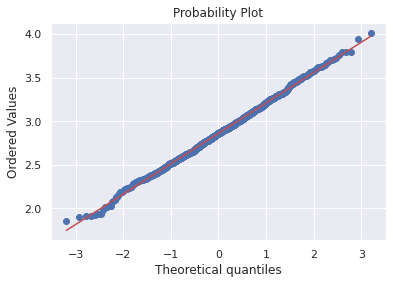

In [27]:
import scipy.stats as stats

stats.probplot(sample_means,dist="norm", plot=plt)

The mean of the sampling distribution of the sample means should be pretty close to the true mean of the population:

In [29]:
mean_sdsm = np.mean(sample_means)
print("Mean of all the sample means: {:.2f}".format(mean_sdsm))
print("Population mean: {:.2f}".format(pop_mean))
print("Difference: {:.2f}".format(pop_mean - mean_sdsm))

Mean of all the sample means: 2.86
Population mean: 2.88
Difference: 0.02


But we can do better than that: we know that in a normal distribution, 95% of the values fall within 2 standard deviations of the mean. Let's check that:

In [32]:
# Standard deviation of the samp. dist. of sample means
std_sdsm = np.std(sample_means)

# The lower and upper bound of the interval that should contain
# ~95% of the sample means
lower_bound = mean_sdsm - 2*std_sdsm
upper_bound = mean_sdsm + 2*std_sdsm

print(round(lower_bound, 2), "-", round(upper_bound, 2))

2.17 - 3.56


In [33]:
# How many of the sample means fall within this interval?
count = 0
for i in sample_means:
    if ( i > lower_bound and i < upper_bound ):
        count +=1
print("Percentage of sample means within 2 std of the mean = {:.2f}".format(count/len(sample_means)*100))

Percentage of sample means within 2 std of the mean = 95.40


Another cool property of the sampling distribution of the sample means is that its *standard deviation* is equal to the standard deviation of the population divided by the square root of n. 

Let's see how this checks out with our data:

In [35]:
print("The standard deviation of all those sample means is: {:.2f}".format(std_sdsm))

The standard deviation of all those sample means is: 0.35


In [36]:
print("The standard deviation of all the sample means divided by the root square of n is: {:.2f}".format(pop_std/np.sqrt(n)))

The standard deviation of all the sample means divided by the root square of n is: 0.35


The *standard deviation of the sampling distribution of the sample means* is also called the **standard error of the mean** and we'll use it in the next lessons.

Before moving on, repeat the experiment with diferent sample sizes (both smaller and greater), and see what happens.

## Squirrels example

Let's assume that the 'pop' values represent the weights of squirrels. We go to the forest, take a sample of 50 squirrels and register their weight:

In [39]:
squirrels = pop.sample(50, random_state=1990)

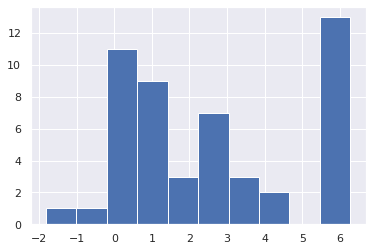

In [40]:
# this is the distribution of the sample
squirrels.hist()

In [41]:
# We wonder if the mean of the weights of the squirrels is
# close to the 'true' mean of the population (which we can't measure)
print("The mean of the sample is: {:.2f}".format(np.mean(squirrels)))

The mean of the sample is: 2.57


The standard error of the mean is an estimate of how far the sample mean is likely to be from the population mean.

It is an estimate of the standard deviation of the distribution of the sample means, which, as we've seen, follows a normal ditribution.

In [45]:
# standard error of the mean
np.std(squirrels)/np.sqrt(len(squirrels))

0.3229993534488167

In [44]:
# using scipy you can also calculate the standard error of the mean
#?stats.sem
stats.sem(squirrels, 
          ddof=0) # degrees of freedom. the default is 1,
                  # which results in a more conservative estimate

0.3229993534488167

We know that no matter the distribution of our sample or the population, the sampling distribution of the sample mean is normal (Central Limit Theorem).

Knowing that, we can use the properties of the normal distribution to gain information about our sample and how much it might differ from the true population.

In a normal distribution, 95% of the observations fall within 2 standard deviations above and below the mean.

We have the mean of the sample. And we also computed the standard error, which is an estimate of the standard deviation of the sample means.

With those values, we can compute the confidence interval.

The **confidence interval** is a 'plausible range of values' for a population parameter (in this case, the mean).


In [47]:
# upper bound of the confidence interval
print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(np.mean(squirrels) + stats.sem(squirrels)*2)) # two standard deviations above

Upper bound to the population mean based on the sample mean with a 95% confidence interval: 3.23


In [48]:
# lower bound of the confidence interval
print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(np.mean(squirrels) - stats.sem(squirrels)*2)) # two standard deviations below

Upper bound to the population mean based on the sample mean with a 95% confidence interval: 1.92


In [49]:
# using scipy to calculate the confidence interval:
low, upp = stats.norm.interval(0.95, # the confidence level
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(upp)) # two standard deviations above
print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(low)) # two standard deviations below                

Upper bound to the population mean based on the sample mean with a 95% confidence interval: 3.21
Upper bound to the population mean based on the sample mean with a 95% confidence interval: 1.93


In [50]:
# using a t distribution:
t_low, t_upp = stats.t.interval(0.95, # the confidence level
                                len(squirrels)-1, # degrees of freedom = sample size - 1
                                loc=np.mean(squirrels), # mean of our sample
                                scale=stats.sem(squirrels)) # standard error of the mean

print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(t_upp)) # two standard deviations above
print("Upper bound to the population mean based on the sample mean with a 95% confidence interval: {:.2f}".format(t_low)) # two standard deviations below           

Upper bound to the population mean based on the sample mean with a 95% confidence interval: 3.23
Upper bound to the population mean based on the sample mean with a 95% confidence interval: 1.92


In the second interval we've used a t distribution, instead of a normal distribution, to get a more conservative estimate of the confidence intermal.

A t distribution is 'flatter' and has 'fat tails' for small populations, and is indistinguishable from a normal distribution for bigger populations.

The confidence interval is slightly thinner if we use a normal distribution.